## 季节性的状态空间表示

另一种表示季节性的方式是对状态空间模型进行修正，在其方程中体现出季节性的成分。例如，考虑下述单噪声源的Local level model:
$$\begin{array}{c}y_t=\alpha_{t-s}+e_t\\
\alpha_{t}=\alpha_{t-s}+\gamma e_t \end{array}$$ 
其中s就代表数据观察的频率。例如，我们每个季度对数据进行一次观测，同时该时间序列在每个时间点的值都与上一年该季度的值相似，因此状态方程可以如下表示：
$$\begin{array}{c}y_t=\alpha_{t-4}+e_t\\
\alpha_{t}=\alpha_{t-4}+\gamma e_t \end{array}$$ 
我们生成该序列，满足$e \sim N(\mu=0;\sigma_{e}^2=.4)$ ， $\gamma=.3$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

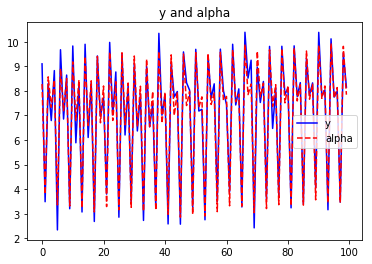

In [12]:
n=100
np.random.seed(1)
se=.4
gamma=.3
e=np.sqrt(se)*np.random.randn(n)
y=np.zeros(n)
alpha=np.zeros(n)
s=4
sfactor=np.random.uniform(0,1,s)*10
y[0]=sfactor[0]+e[0];
y[1]=sfactor[1]+e[1];
y[2]=sfactor[2]+e[2];
y[3]=sfactor[3]+e[3];
alpha[0]=sfactor[0]+.2*e[0]
alpha[1]=sfactor[1]+.2*e[1]
alpha[2]=sfactor[2]+.2*e[2]
alpha[3]=sfactor[3]+.2*e[3]
for t in range(4,n):
    alpha[t]=alpha[t-s]+gamma*e[t]
    y[t]=alpha[t-s]+e[t]
plt.plot(y,'b',label="y")
plt.plot(alpha,'r--',label="alpha")
plt.title("y and alpha")
plt.legend()
plt.show()

由于仍然是状态空间方程的形式，因此极大似然估计的方法在此处仍然适用：

In [15]:
s=4
state=np.zeros(n)
e=np.zeros(n)
state[0:s]=y[0:s]
def conML(myparam):
    gamma=abs(myparam)
    for t in range(s,n):
        e[t]=y[t]-state[t-s]
        state[t] =state[t-s]+gamma*e[t] 
    return np.sum(e[1:n]**2)/(n-1)
res=optimize.minimize(conML,[.4],bounds=[(0,1)])
print("极大似然估计所得结果：",res.x)
print("真实参数：",gamma)
print("e的估计方差:",res.fun)
print("e的真实方差::",se)

极大似然估计所得结果： [ 0.3625096]
真实参数： 0.3
e的估计方差: 0.297584866249
e的真实方差:: 0.4


其中极大似然估计的结果0.36就是信噪比。

下面生成一个带漂移的Local level过程：

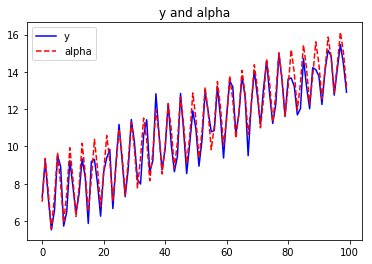

In [16]:
n=100
np.random.seed(1123)
se=.4
co=.3
gamma=.1
e=np.sqrt(se)*np.random.randn(n)
y=np.zeros(n)
alpha=np.zeros(n)
s=4
sfactor=np.random.uniform(0,1,s)*10
y[0]=sfactor[0]+e[0];
y[1]=sfactor[1]+e[1];
y[2]=sfactor[2]+e[2];
y[3]=sfactor[3]+e[3];
alpha[0]=sfactor[0]+.2*e[0]
alpha[1]=sfactor[1]+.2*e[1]
alpha[2]=sfactor[2]+.2*e[2]
alpha[3]=sfactor[3]+.2*e[3]
for t in range(4,n):
    alpha[t]=co+alpha[t-s]+gamma*e[t]
    y[t]=alpha[t-s]+e[t]
plt.plot(y,'b',label="y")
plt.plot(alpha,'r--',label="alpha")
plt.title("y and alpha")
plt.legend()
plt.show()

然后用与上面同样的似然函数对参数进行估计：

In [18]:
s=4
state=np.zeros(n)
v=np.zeros(n)
state[0:s]=y[0:s]
def conML(myparam):
    gamma=abs(myparam[0])
    co=abs(myparam[1])
    for t in range(s,n):
        v[t]=y[t]-state[t-s]
        state[t] =co+state[t-s]+gamma*v[t] 
    return np.sum(v[1:n]**2)/(n-1)
res=optimize.minimize(conML,[.2,.2])
print("极大似然估计所得结果：",res.x)
print("真实参数：",gamma,co)
print("e的估计方差:",res.fun)
print("e的真实方差::",se)

极大似然估计所得结果： [ 0.17714303  0.30315977]
真实参数： 0.1 0.3
e的估计方差: 0.3774558995886459
e的真实方差:: 0.4
